In [8]:
def ricerca_trend_players( file, partita, anno_corrente, nome_torneo ) :
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    file_read = pd.read_excel( file )
    dataframe_torneo = pd.DataFrame( file_read )
    n1 = partita.split("_")[0]
    n2 = partita.split("_")[1]
    dict_placements = {1:7,
                       2:6,
                       3:5, 4:5,
                       5:4, 6:4, 7:4, 8:4,
                       9:3, 10:3, 11:3, 12:3, 13:3, 14:3, 15:3, 16:3,
                       17:2, 18:2, 19:2, 20:2, 21:2, 22:2, 23:2, 24:2, 
                       25:2, 26:2, 27:2, 28:2, 29:2, 30:2, 31:2, 32:2 }
    dict_anni = {'2014':0,
                 '2015':1,
                 '2016':2,
                 '2017':3,
                 '2018':4,
                 '2019':5,
                 '2020':6,
                 '2021':7 }
    years = dataframe_torneo.iloc[:,0]
    idx_3_prev_ys = []
    for idx, v in enumerate ( years ) :
        if int( v )==anno_corrente :
            idx_3_prev_ys.append( idx-3 )
            idx_3_prev_ys.append( idx-2 )
            idx_3_prev_ys.append( idx-1 )
    n1_1 = 0
    n1_2 = 0
    n1_3 = 0
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[2],:] ) :
        if n1==v :
            n1_1 = n1_1+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[1],:] ) :
        if n1==v :
            n1_2 = n1_2+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[0],:] ) :
        if n1==v :
            n1_3 = n1_3+idx
    
    n2_1 = 0
    n2_2 = 0
    n2_3 = 0
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[2],:] ) :
        if n2==v :
            n2_1 = n2_1+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[1],:] ) :
        if n2==v :
            n2_2 = n2_2+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[0],:] ) :
        if n2==v :
            n2_3 = n2_3+idx
    
    n1_list = []
    n1_list.append( n1_3 )
    n1_list.append( n1_2 )
    n1_list.append( n1_1 )
    n1_list_data = pd.DataFrame()
    n1_list_data['cols1'] = n1_list
    
    points_n1 = n1_list_data['cols1'].map( dict_placements )
    
    n2_list = []
    n2_list.append( n2_3 )
    n2_list.append( n2_2 )
    n2_list.append( n2_1 )
    n2_list_data = pd.DataFrame()
    n2_list_data['cols2'] = n2_list
    
    points_n2 = n2_list_data['cols2'].map( dict_placements )
    
    passi = [ -3, -2, -1 ]
    
    points_n1 = pd.Series( points_n1 )
    points_n1 = points_n1.fillna( -1 )
    
    points_n2 = pd.Series( points_n2 )
    points_n2 = points_n2.fillna( -1 )
    
    
    plt.figure( figsize=(10,10) )
    plt.plot( passi, points_n1,'-o', label=n1 )
    plt.plot( passi, points_n2,'-o', label=n2 )
    plt.xticks([-3,-2,-1],['3 anni fa','2 anni fa','anno scorso'])
    plt.yticks([-1,2,3,4,5,6,7],['NaN','32s','OTT','QRT','SF','F','W'])
    plt.title( nome_torneo )
    plt.legend()
    plt.grid()
    plt.show()
    
    
    
    
            
            
        
            

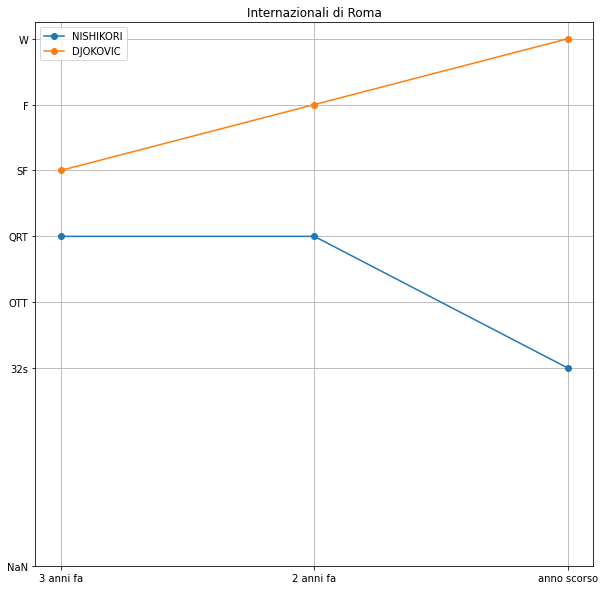

In [9]:
ricerca_trend_players("DATA/Rome_PLACEMENTS_DATA.xlsx", "NISHIKORI_DJOKOVIC", 2021, "Internazionali di Roma" )

In [10]:
def MASTERS_1000_CLAY_LAST_3_YEARS( partita, anno ) :
    ricerca_trend_players("DATA/MonteCarlo_PLACEMENTS_DATA.xlsx", partita, anno, "Montecarlo" )
    ricerca_trend_players("DATA/Madrid_placements_data.xlsx", partita, anno, "Madrid" )
    ricerca_trend_players("DATA/Rome_PLACEMENTS_DATA.xlsx", partita , anno, "Internazionali di Roma" )

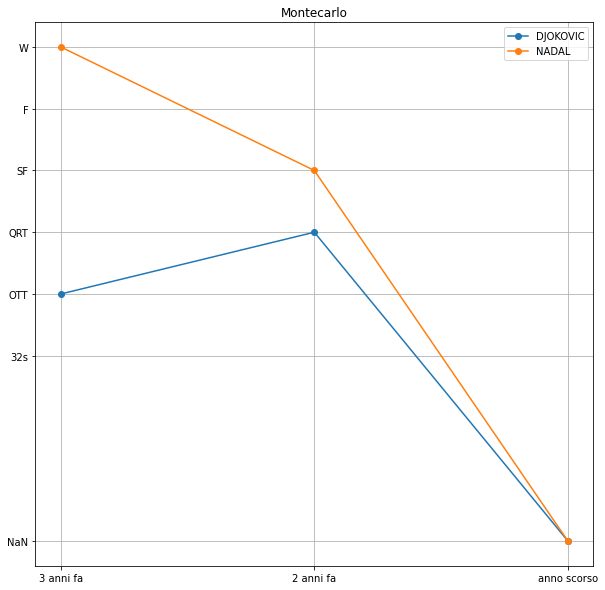

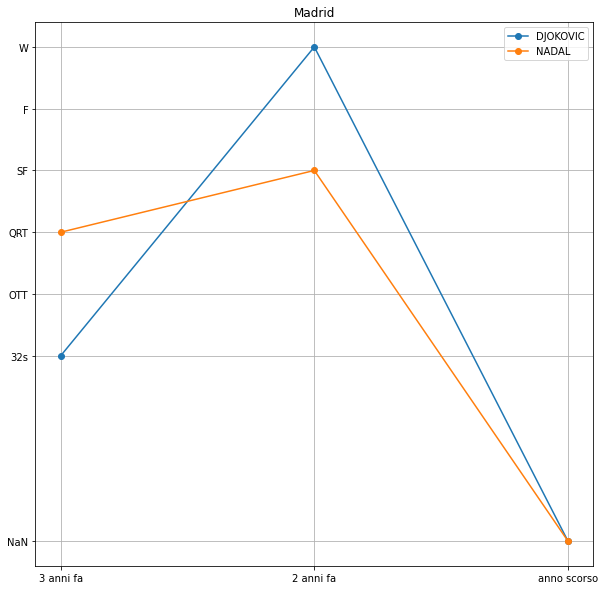

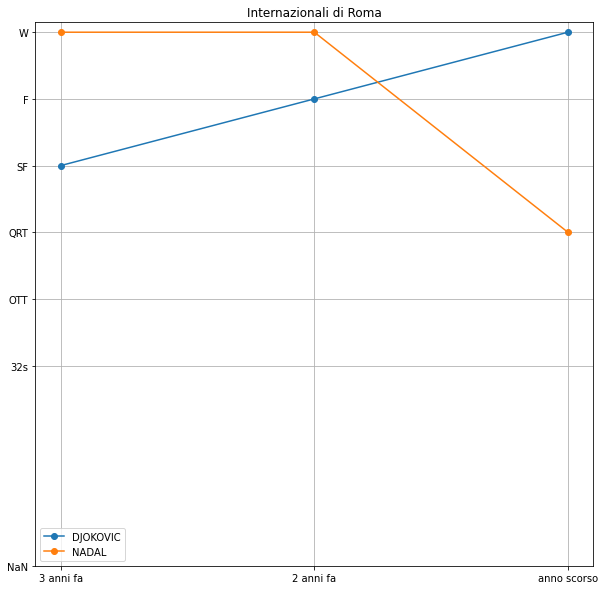

In [11]:
MASTERS_1000_CLAY_LAST_3_YEARS( "DJOKOVIC_NADAL", 2021 )

In [12]:
def MASTERS_1000_HARD_LAST_3_YEARS( partita, anno ) :
    ricerca_trend_players("DATA/IndianWells_PLACEMENTS_DATA.xlsx", partita, anno, "Indian Wells" )
    ricerca_trend_players("DATA/Miami_PLACEMENTS_DATA.xlsx", partita, anno, "Miami" )
    ricerca_trend_players("DATA/Canada_PLACEMENTS_DATA.xlsx", partita , anno, "Canada" )
    ricerca_trend_players("DATA/Cincinnati_PLACEMENTS_DATA.xlsx", partita, anno, "Cincinnati" )
    ricerca_trend_players("DATA/Shanghai_PLACEMENTS_DATA.xlsx", partita, anno, "Shanghai" )
    ricerca_trend_players("DATA/Parigi_1000_PLACEMENTS_DATA.xlsx", partita , anno, "Parigi" )

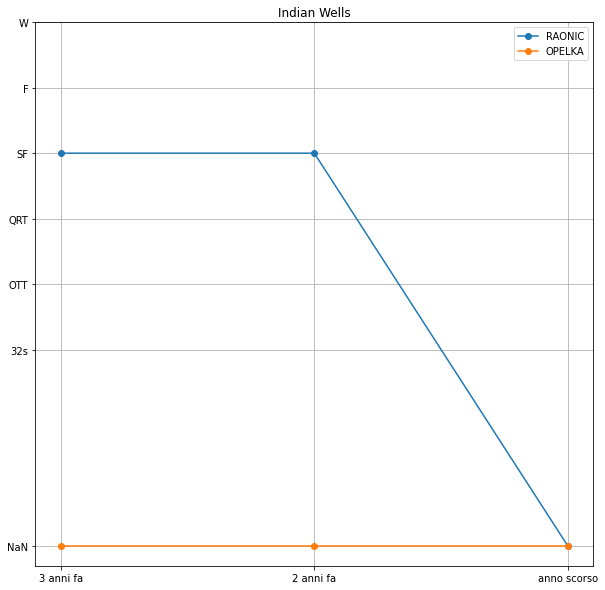

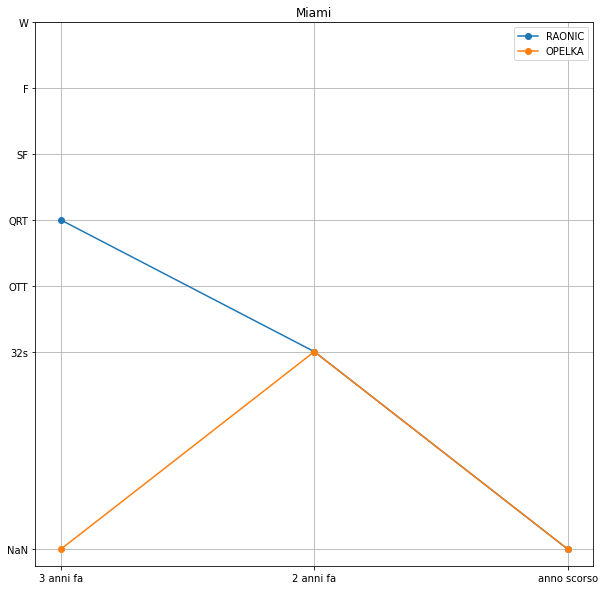

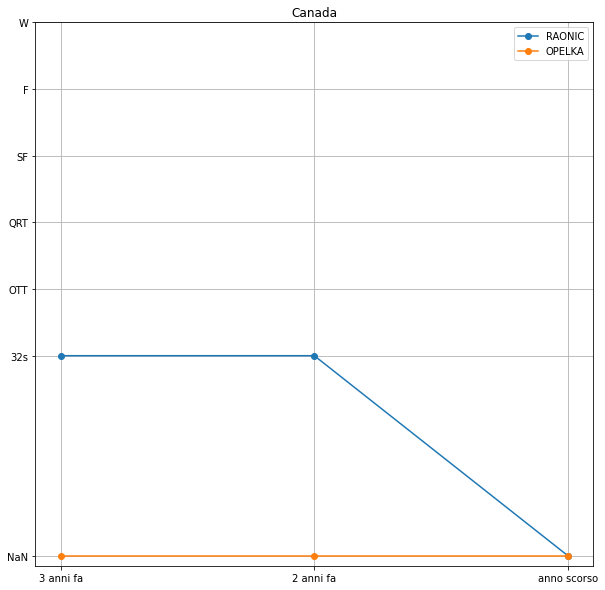

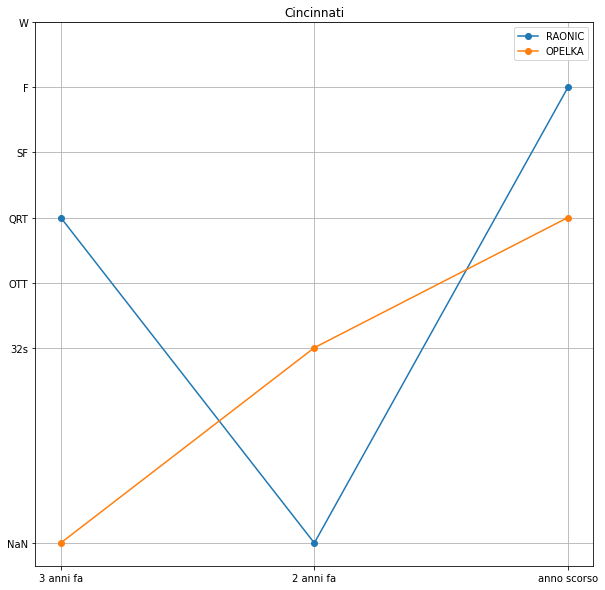

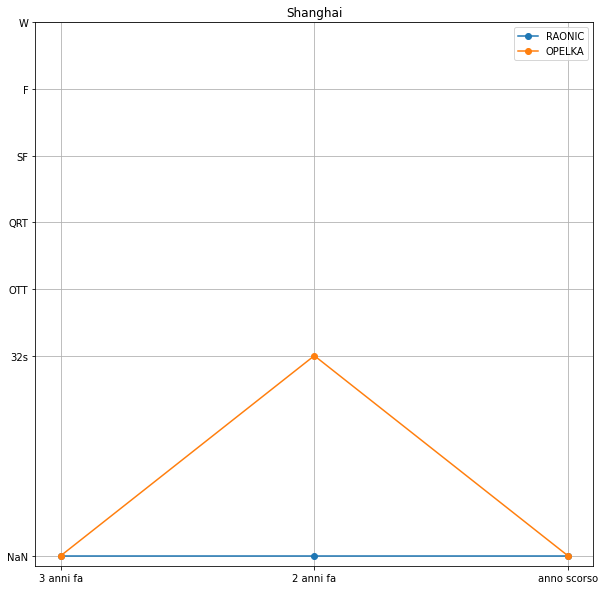

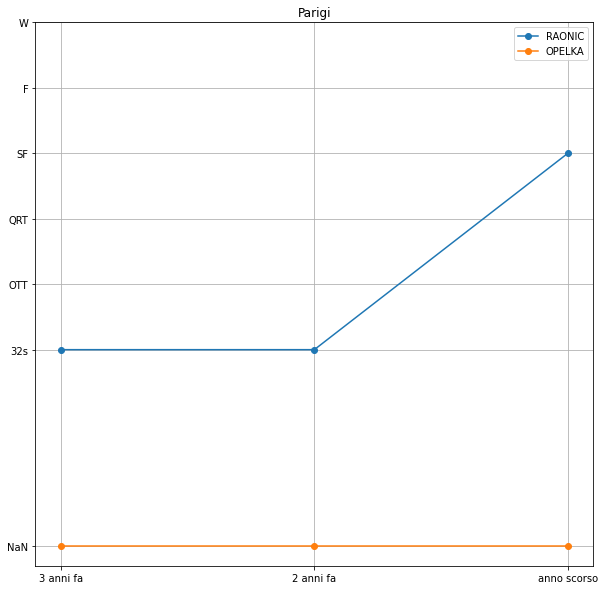

In [14]:
MASTERS_1000_HARD_LAST_3_YEARS( "RAONIC_OPELKA", 2021 )

In [15]:
def MASTERS_1000_ALL( partita, anno ) :
    MASTERS_1000_CLAY_LAST_3_YEARS( partita, anno )
    MASTERS_1000_HARD_LAST_3_YEARS( partita, anno )
    

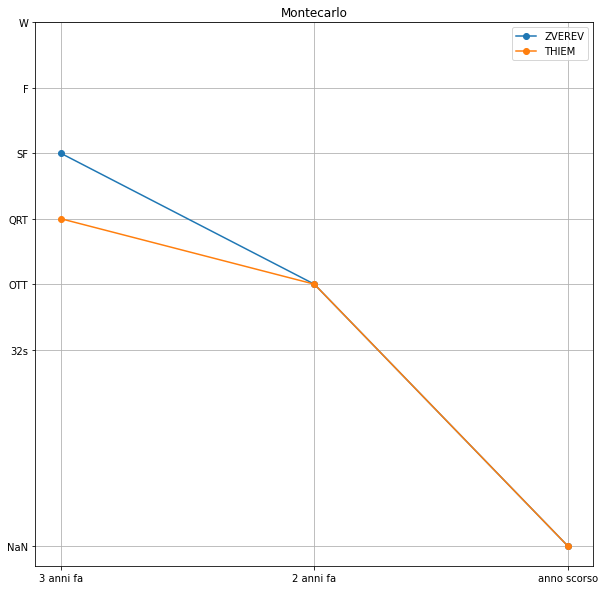

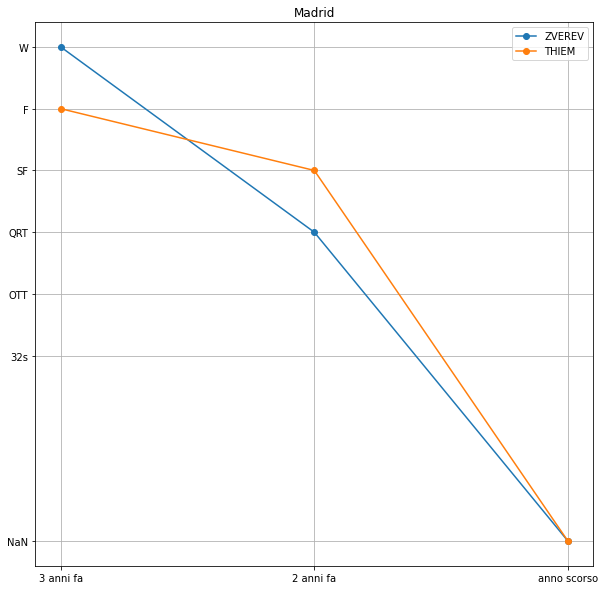

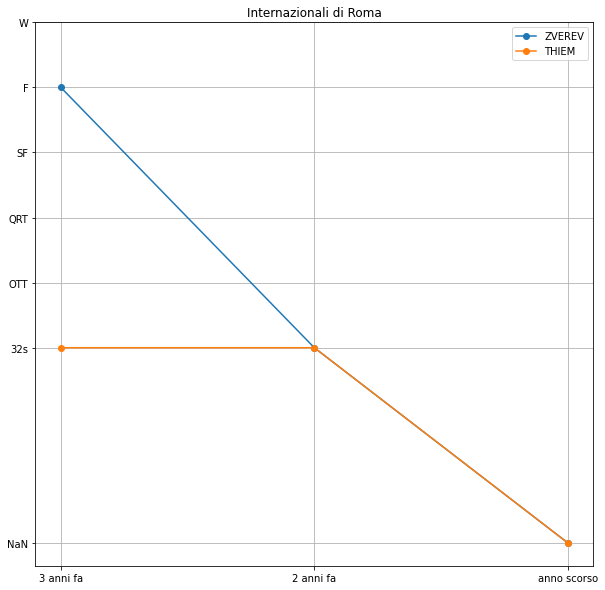

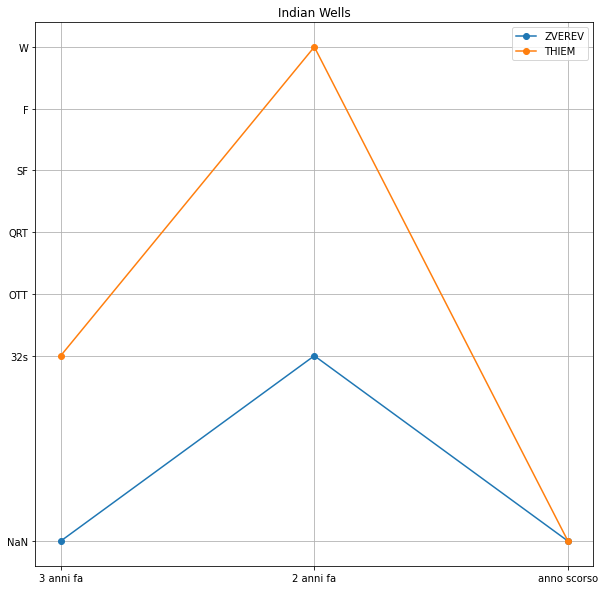

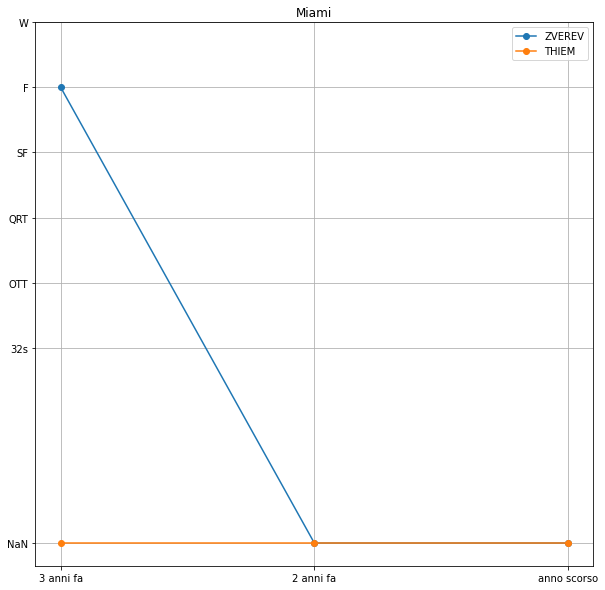

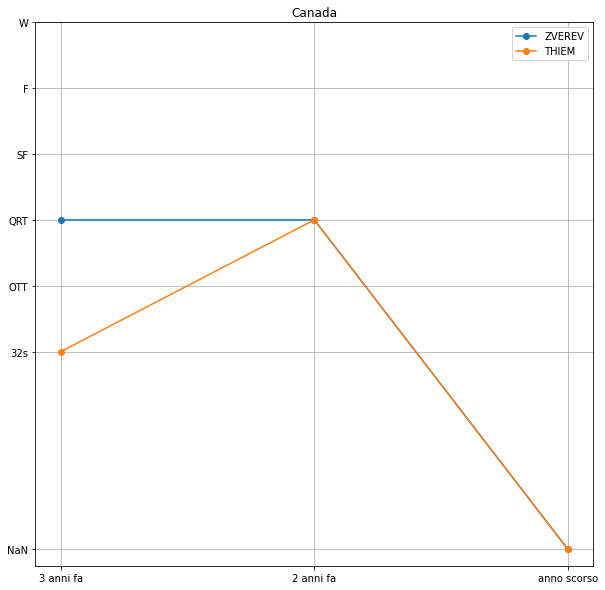

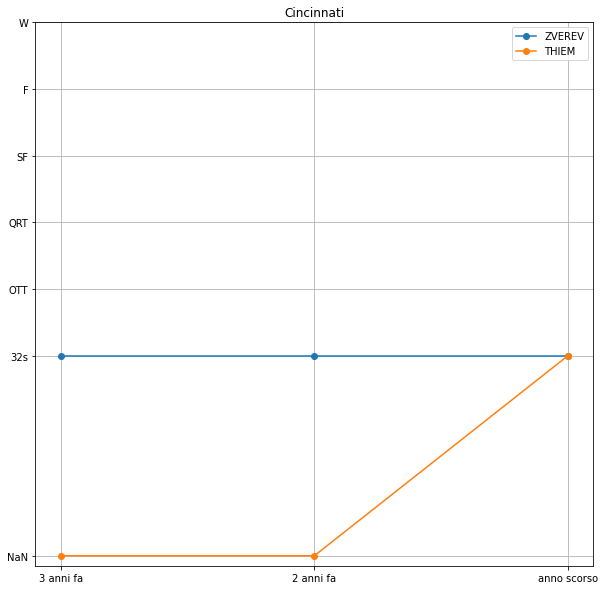

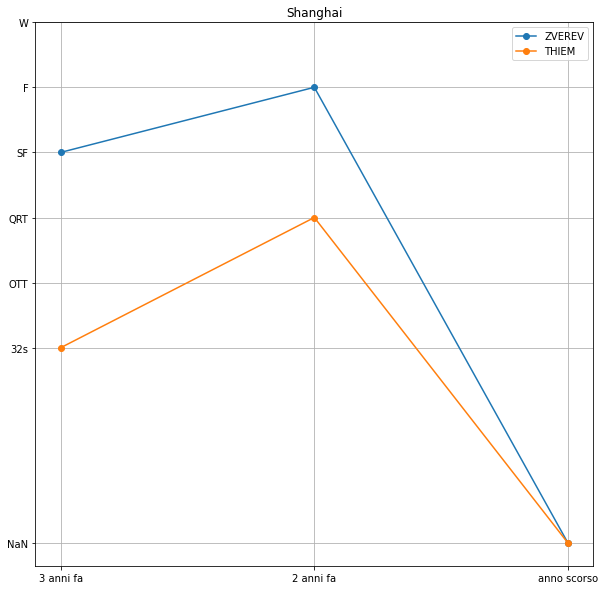

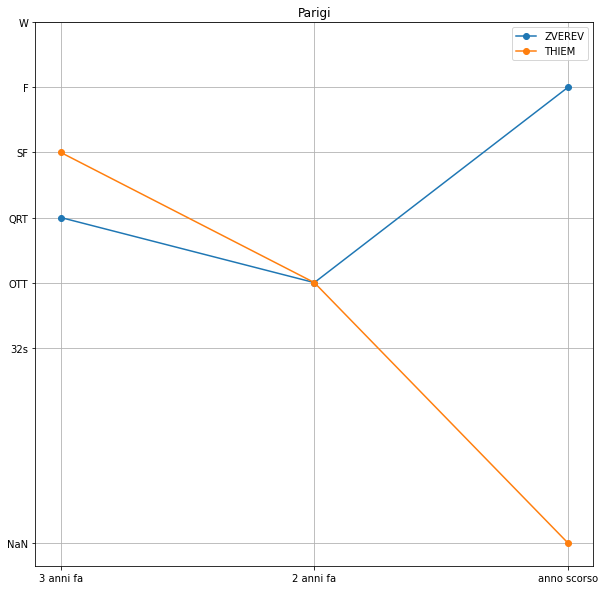

In [16]:
MASTERS_1000_ALL( "ZVEREV_THIEM", 2021 )